In [173]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sn
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

## Q1

Start with reading data

In [62]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Checking the data

In [63]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

Rename the columns

In [64]:
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','country','salary']

In [65]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week are continuous variables and workclass,  education,  marital-status,  occupation,  relationship,  race,  sex,  country,  salary are categorical


now we should decide which columns should be included to the model

In [174]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Label encoding to preapare the data

In [66]:
le=LabelEncoder()

data['sex']=le.fit_transform(data['sex'])

data['occupation']=le.fit_transform(data['occupation'])

data['race']=le.fit_transform(data['race'])

data['salary']=le.fit_transform(data['salary'])

In [67]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,6,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,6,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,10,Wife,2,0,0,0,40,Cuba,0


In [175]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Models...

In [82]:

gbc = GradientBoostingClassifier(random_state = 0, learning_rate=0.45) 
lr = LogisticRegression(random_state = 0)
dtc = DecisionTreeClassifier(random_state = 0)
svc = SVC(random_state = 0)
knn = KNeighborsRegressor(n_neighbors=2)

lst = []

x, y =data[['age','education-num','hours-per-week','race','sex']],data['salary']

cv = KFold(n_splits=10, random_state=1, shuffle=True)

for i in(gbc,dtc,lr,svc,knn):
  
    scores = cross_val_score(i, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

    print('Accuracy of the model: %.3f (%.3f)' %  (mean(scores), std(scores)))
    
    lst.append(scores)
l


Accuracy of the model: 0.809 (0.007)
Accuracy of the model: 0.778 (0.007)
Accuracy of the model: 0.803 (0.006)
Accuracy of the model: 0.803 (0.007)
Accuracy of the model: nan (nan)


neural network

In [176]:

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [91]:
model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
model.fit(x, y, epochs=15, batch_size=10)

Epoch 1/15
3257/3257 [==============================] - 3s 921us/step - loss: 0.6543 - accuracy: 0.7291
Epoch 2/15
3257/3257 [==============================] - 3s 853us/step - loss: 0.5081 - accuracy: 0.7592
Epoch 3/15
3257/3257 [==============================] - 3s 889us/step - loss: 0.4849 - accuracy: 0.7675
Epoch 4/15
3257/3257 [==============================] - 3s 881us/step - loss: 0.4672 - accuracy: 0.7776
Epoch 5/15
3257/3257 [==============================] - 3s 904us/step - loss: 0.4542 - accuracy: 0.7886
Epoch 6/15
3257/3257 [==============================] - 3s 962us/step - loss: 0.4448 - accuracy: 0.7936
Epoch 7/15
3257/3257 [==============================] - 3s 948us/step - loss: 0.4396 - accuracy: 0.7952
Epoch 8/15
3257/3257 [==============================] - 3s 964us/step - loss: 0.4346 - accuracy: 0.8001
Epoch 9/15
3257/3257 [==============================] - 3s 924us/step - loss: 0.4305 - accuracy: 0.8009
Epoch 10/15
3257/3257 [==============================] - 3s 907u

In [97]:
_, accuracya = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracya))

1018/1018 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8032
Accuracy: 0.80


## Q2

In [98]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [99]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

label encoding for the target

In [100]:
data['Class']=le.fit_transform(data['Class'])

In [101]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


models...

In [102]:
# evaluate a logistic regression model using k-fold cross-validation
gbc = GradientBoostingClassifier(random_state = 0, learning_rate=0.45) 
lr = LogisticRegression(random_state = 0)
dtc = DecisionTreeClassifier(random_state = 0)
svc = SVC(random_state = 0)
knn = KNeighborsRegressor(n_neighbors=2)

lst = []
# create dataset
x, y =data.drop(['Class'],axis=1),data['Class']
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for i in(gbc,dtc,lr,svc,knn):
  
    scores = cross_val_score(i, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
    print('Accuracy of the model: %.3f (%.3f)' %  (mean(scores), std(scores)))
    
    lst.append(scores)
# create model
#model = LogisticRegression()
# evaluate model

Accuracy of the model: 0.918 (0.010)
Accuracy of the model: 0.893 (0.009)
Accuracy of the model: 0.704 (0.014)
Accuracy of the model: 0.635 (0.014)
Accuracy of the model: nan (nan)


neural network

In [116]:
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x, y, epochs=5, batch_size=10)

Epoch 1/5
1362/1362 [==============================] - 2s 1ms/step - loss: -77378688.0000 - accuracy: 0.0389
Epoch 2/5
1362/1362 [==============================] - 2s 1ms/step - loss: -1052516352.0000 - accuracy: 0.0384
Epoch 3/5
1362/1362 [==============================] - 2s 1ms/step - loss: -3915035392.0000 - accuracy: 0.0384
Epoch 4/5
1362/1362 [==============================] - 2s 1ms/step - loss: -9164199936.0000 - accuracy: 0.0384
Epoch 5/5
1362/1362 [==============================] - 1s 1ms/step - loss: -17325008896.0000 - accuracy: 0.0384


In [111]:
_, accuracya = model.evaluate(x, y)


426/426 [==============================] - 0s 801us/step - loss: -6124864512.0000 - accuracy: 0.0384


## Q4


In [118]:
#!pip install rdatasets
from rdatasets import data

<AxesSubplot:>

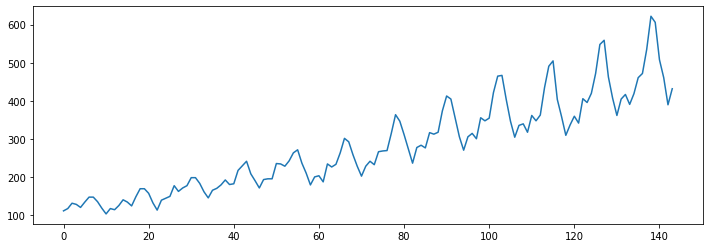

In [261]:
airline = data('AirPassengers')

plt.figure(figsize=(12,4))
airline['value'].plot()

In [177]:
from sklearn.preprocessing import MinMaxScaler

we will use the number of the passengers as data

In [262]:
airline = airline.iloc[:,1].values.reshape(-1,1)

In [263]:
airline = airline.astype('float32')

scaling

In [264]:
scaler = MinMaxScaler(feature_range=(0, 1))
airline = scaler.fit_transform(airline)

In [265]:
train = airline[:123]
test = airline[123:]

prepare the data for lstm

In [266]:
X = []
Y = []
for i in range(len(train)-10-1):
    a = train[i:(i+10),0]
    X.append(a)
    Y.append(train[i+10,0])
trainX = np.array(X)
trainY = np.array(Y)

In [231]:
X = []
Y = []
for i in range(len(test)-10-1):
    a = test[i:(i+10),0]
    X.append(a)
    Y.append(test[i+10,0])
testX = np.array(X)
testY = np.array(Y)

In [232]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [203]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, 10))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
112/112 [==============================] - 1s 2ms/step - loss: 0.0357
Epoch 2/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 4/50
112/112 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 5/50
112/112 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 6/50
112/112 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 7/50
112/112 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 9/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 10/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 11/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 12/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 13/50
112/112 [====

In [204]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [208]:
import math
from sklearn.metrics import mean_squared_error

In [211]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 36.77 RMSE
